In [9]:
import os   # 导入标准库os，操作系统接口模块
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
%matplotlib inline   # 为了方便别人也许是Jupter Notebook之类的打开你的文件用的  Pycharm等软件不用
# from pyforest import *

UsageError: unrecognized arguments: # 为了方便别人也许是Jupter Notebook之类的打开你的文件用的 Pycharm等软件不用


In [10]:
# 设置画布和字体
mpl.rcParams['font.size'] = 12
mpl.rcParams['figure.figsize'] = (12,5)

In [11]:
# 获取文件
file_path = './PartA'
file_list = os.listdir(file_path)   # 获取这个目录下所有的文件

In [12]:
file_list

['DistGrowth_HighStockingRate.xls',
 'DistGrowth_LowStockingRate.xls',
 'DistGrowth_MediumStockingRate.xls']

In [13]:
# 获取这些文件名里面有用的名称
cases = []
for filename in file_list:
    case = filename[11: -4]
    cases.append(case)
cases

['HighStockingRate', 'LowStockingRate', 'MediumStockingRate']

In [14]:
# 合并三个表格的数据
df_list = []
for i in range(3):   # for循环去处理每个excel里面的列
    ratename = cases[i]
    if ratename == 'HighStockingRate':    #预先看一下需要跳过多少行然后才开始处理数据
        num_skiprows = 12
    else:
        num_skiprows = 10

    df_temp = pd.read_excel(file_path + '/' + file_list[i], skiprows=num_skiprows)   # 读取数据
    df_temp = df_temp.loc[:,[df_temp.columns[1],df_temp.columns[5]]]   # loc索引  获取有用的数据 因为原数据中间之间有空的数据  这里是第一列和第五列有用
    df_temp.columns = [ratename + '_date', ratename]   # 重新命名两个列的列名  XXXX_date命名方式
    df_list.append(df_temp)   # for循环了3次 每循环一次就读取到list当中

In [15]:
# 使用concat函数进行合并
df = pd.concat(df_list, axis=1)
df

,HighStockingRate_date,HighStockingRate,LowStockingRate_date,LowStockingRate,MediumStockingRate_date,MediumStockingRate
0,10/01/2013,NaN,10/01/2013,NaN,10/01/2013,NaN
1,18/02/2013,NaN,18/02/2013,NaN,18/02/2013,NaN
2,04/03/2013,7.0,04/03/2013,17.0,04/03/2013,12.0
3,11/03/2013,23.0,11/03/2013,23.0,11/03/2013,15.0
4,15/03/2013,20.0,15/03/2013,28.0,15/03/2013,16.0
...,...,...,...,...,...,...
93,15/06/2015,88.0,15/06/2015,83.0,15/06/2015,89.0
94,22/06/2015,71.0,22/06/2015,90.0,22/06/2015,67.0
95,29/06/2015,49.0,29/06/2015,60.0,29/06/2015,54.0
96,06/07/2015,65.0,06/07/2015,76.0,06/07/2015,75.0


In [16]:
df.columns

Index(['HighStockingRate_date', 'HighStockingRate', 'LowStockingRate_date',
       'LowStockingRate', 'MediumStockingRate_date', 'MediumStockingRate'],
      dtype='object')

In [17]:
# 因为三个excel里面的列名都是一样的 所以删除两个列名 简化
#    inplace参数的理解：
#          修改一个对象时：
#                inplace=True：不创建新的对象，直接对原始对象进行修改；
#                inplace=False：对数据进行修改，创建并返回新的对象承载其修改结果。
df.drop(['LowStockingRate_date','MediumStockingRate_date'],axis=1,inplace=True)
df.fillna(0,inplace=True)
df.head()

,HighStockingRate_date,HighStockingRate,LowStockingRate,MediumStockingRate
0,10/01/2013,0.0,0.0,0.0
1,18/02/2013,0.0,0.0,0.0
2,04/03/2013,7.0,17.0,12.0
3,11/03/2013,23.0,23.0,15.0
4,15/03/2013,20.0,28.0,16.0


In [18]:
# 重命名列名  为了好看
df.rename(columns={'HighStockingRate_date':'StockingRate_date'},inplace=True)
df

,StockingRate_date,HighStockingRate,LowStockingRate,MediumStockingRate
0,10/01/2013,0.0,0.0,0.0
1,18/02/2013,0.0,0.0,0.0
2,04/03/2013,7.0,17.0,12.0
3,11/03/2013,23.0,23.0,15.0
4,15/03/2013,20.0,28.0,16.0
...,...,...,...,...
93,15/06/2015,88.0,83.0,89.0
94,22/06/2015,71.0,90.0,67.0
95,29/06/2015,49.0,60.0,54.0
96,06/07/2015,65.0,76.0,75.0


In [19]:
# 处理日期 把日期作为索引
df.set_index(pd.to_datetime(df['StockingRate_date'],format='%d/%m/%Y'),inplace=True)
df

,StockingRate_date,HighStockingRate,LowStockingRate,MediumStockingRate
StockingRate_date,,,,
2013-01-10,10/01/2013,0.0,0.0,0.0
2013-02-18,18/02/2013,0.0,0.0,0.0
2013-03-04,04/03/2013,7.0,17.0,12.0
2013-03-11,11/03/2013,23.0,23.0,15.0
2013-03-15,15/03/2013,20.0,28.0,16.0
...,...,...,...,...
2015-06-15,15/06/2015,88.0,83.0,89.0
2015-06-22,22/06/2015,71.0,90.0,67.0
2015-06-29,29/06/2015,49.0,60.0,54.0


In [20]:
# 删除原日期列
df.drop('StockingRate_date',axis=1,inplace=True)
df

,HighStockingRate,LowStockingRate,MediumStockingRate
StockingRate_date,,,
2013-01-10,0.0,0.0,0.0
2013-02-18,0.0,0.0,0.0
2013-03-04,7.0,17.0,12.0
2013-03-11,23.0,23.0,15.0
2013-03-15,20.0,28.0,16.0
...,...,...,...
2015-06-15,88.0,83.0,89.0
2015-06-22,71.0,90.0,67.0
2015-06-29,49.0,60.0,54.0


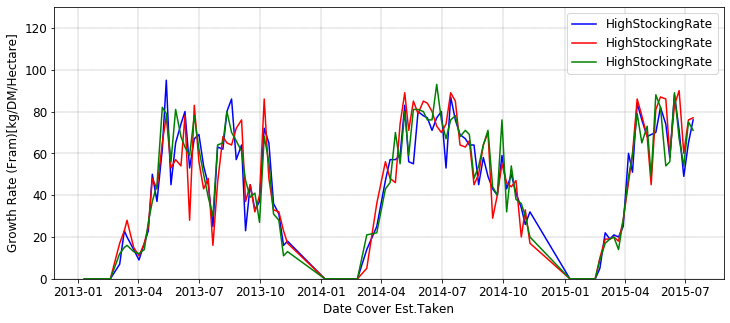

In [21]:
# 开始作图
fig1, ax1 = plt.subplots()   # 分别画图
ax1.plot(df.index,df.HighStockingRate,label=df.columns[0],color='b')
ax1.plot(df.index,df.LowStockingRate,label=df.columns[0],color='r')
ax1.plot(df.index,df.MediumStockingRate,label=df.columns[0],color='g')

ax1.set_xlabel('Date Cover Est.Taken')
ax1.set_ylabel('Growth Rate (Fram)[kg/DM/Hectare]')
ax1.set_ylim(0,130)   # set_lim设置参数值
ax1.legend(loc='best')   # 设置图例
ax1.grid(color='k',linestyle='--',linewidth=0.2)   # 设置网格

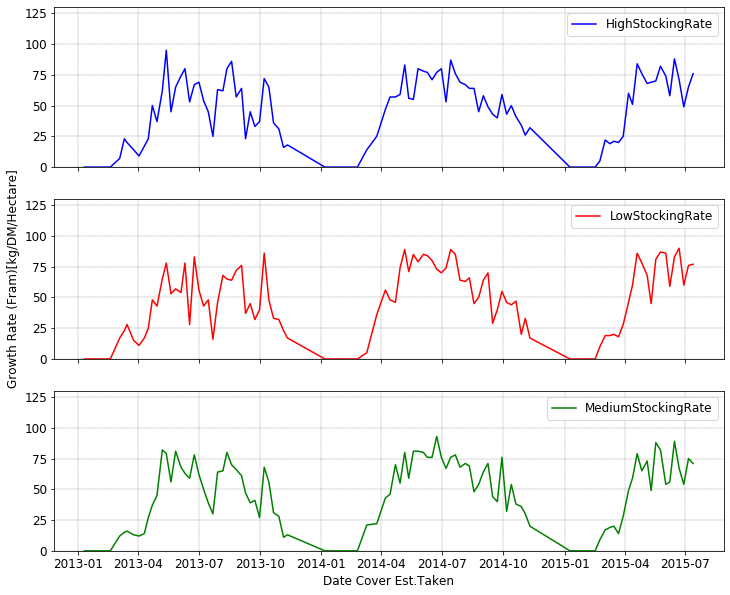

In [22]:
# 把3个曲线分开画图 一般和上图一起出现，方便使用和查看
fig4, [ax1, ax2, ax3] = plt.subplots(3,1,sharex='col',figsize=(12,10))   # 共享x轴sharex

ax1.plot(df.index,df.HighStockingRate,label=df.columns[0],color='b')
ax2.plot(df.index,df.LowStockingRate,label=df.columns[1],color='r')
ax3.plot(df.index,df.MediumStockingRate,label=df.columns[2],color='g')

ax3.set_xlabel('Date Cover Est.Taken')   # 设置xy轴的说明，可以只写两个，因为三个图是一起出现的
ax2.set_ylabel('Growth Rate (Fram)[kg/DM/Hectare]')   # 设置xy轴的说明，可以只写两个，因为三个图是一起出现 的

for ax in [ax1,ax2,ax3]:
    ax.legend(loc='1')
    ax.set_ylim(0,130)
    ax.set_yticks(np.arange(0,150,25))
    ax.grid(color='k',linestyle='--',linewidth=0.2)
ax3.legend()